In [19]:
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import time


In [20]:
#Que1
def dataMatrix(n, f):
    return np.random.rand(n,f)

In [21]:
X = dataMatrix(5, 5)
X

array([[4.45811646e-02, 7.21253409e-01, 1.03696413e-01, 9.72961191e-01,
        3.64454426e-01],
       [8.95839788e-01, 5.53854962e-02, 8.21296845e-01, 5.74137590e-01,
        8.56229306e-01],
       [9.67871455e-01, 1.64125813e-01, 8.45843851e-01, 6.01259326e-01,
        2.19647327e-02],
       [2.72742694e-01, 3.24512114e-01, 7.40066433e-01, 6.89664931e-01,
        3.64920936e-04],
       [5.61981802e-01, 3.46793943e-01, 4.67718722e-01, 1.17730216e-01,
        5.73998335e-01]])

In [22]:
#Que2
def output(X, W, W0, var):
    a = np.dot(X, W)
    a = a.sum(axis = 1)
    #print(a)
    #print(a + W0)
    return a + W0 + var
    

In [23]:
W = np.random.rand(5, 1)
W0 = np.random.rand(1,1)
var = np.random.rand(1, 5)

In [24]:
Y = output(X, W , W0, var)

In [25]:
Y

array([[1.8198382 , 2.46216791, 1.53054234, 1.43050189, 1.73492988]])

In [26]:
#Que3
def linearRegressionEstimate(X, w):
    y = np.dot(X, w)
    return y

In [27]:
linearRegressionEstimate(X, W)

array([[0.61025095],
       [1.15509794],
       [0.44146231],
       [0.40692667],
       [0.71652213]])

In [28]:
#Que4
def meanSquareError(y, t):
    mse = np.mean((y - t) ** 2)
    return mse

In [29]:
t = np.random.rand(1, 5)
meanSquareError(Y, t)


1.7367145162889919

In [30]:
#Que5
def linearRegressionWeights(X, t, lamda):
    X_reg = X.T.dot(X)
    X_reg = X_reg + lamda * np.eye(X.shape[0])
    X_pinv = np.linalg.pinv(X_reg)
    w = np.dot(X_pinv, t.T)
    y = X.dot(w)
    mse = meanSquareError(y, t)
    return w, mse, y


In [31]:
linearRegressionWeights(X, t, 3)

(array([[-0.0753706 ],
        [ 0.09926943],
        [ 0.08320693],
        [ 0.07161375],
        [ 0.17143244]]),
 0.2357531712450736,
 array([[0.20902328],
        [0.19421732],
        [0.0605476 ],
        [0.12268806],
        [0.13781961]]))

In [32]:
#Que6
def gradientMSE(X, t, w):
    y = linearRegressionEstimate(X, w)
    err = y - t
    gradient = 2 * np.dot(X.T, err) / X.shape[0]
    return gradient

In [33]:
gradientMSE(X, t, W)

array([[ 0.6621422 ,  0.19016873,  0.10194487,  0.06937266, -0.11747068],
       [ 0.30113909,  0.02376033, -0.02808883, -0.04723152, -0.15703933],
       [ 0.65769071,  0.14517812,  0.04937647,  0.01400654, -0.18888529],
       [ 0.60513679,  0.09655913,  0.001493  , -0.03360536, -0.23493945],
       [ 0.56093186,  0.24829021,  0.18984952,  0.16827325,  0.04450568]])

In [34]:
#Que7
def l2Norm(w):
    norm2 = np.linalg.norm(w, ord=2) #Order 2 L2 normalization
    return norm2

In [35]:
print(W)
print(l2Norm(W))


[[0.01758252]
 [0.077122  ]
 [0.31851735]
 [0.20453109]
 [0.8829984 ]]
0.9639654494450257


In [36]:
#Que8
def gradientL2Nnorm(w):
    gradient = np.zeros(w.shape)
    gradient = w / np.linalg.norm(w, ord=2)
    return gradient

In [37]:
gradientL2Nnorm(W)

array([[0.01823978],
       [0.08000495],
       [0.33042403],
       [0.21217678],
       [0.91600627]])

In [38]:
#Que9
def l1Norm(w):
    norm1 = np.linalg.norm(w, ord=1) #Order 1 L1 normalization
    return norm1

In [39]:
print(l1Norm(W))

1.5007513556472278


In [40]:
#Que10
def gradientL1Nnorm(w):
    gradient = np.zeros(w.shape)
    gradient = w / np.linalg.norm(w, ord=1)
    return gradient

In [41]:
#Que11
def update_weights_linear_regression(X, t, w, eta, lambda2, lambda1):
    y = linearRegressionEstimate(X, w)
    mse = 0.5*meanSquareError(y, t)
    error = (y - t)# + lambda2*w + lambda1*np.sign(w)
    gradient = X.T.dot(error) / X.shape[0]
    #weights -= eta * gradient
    #gradient = (np.dot(X.T + lambda2*w + lambda1*np.sign(w), (y-t)))/(X.shape[0])
    w = w - (eta*gradient)
    return w, mse

In [42]:
update_weights_linear_regression(X, t, W, 0.1, 2, 1)

(array([[-0.01552459,  0.00807408,  0.01248528,  0.01411389,  0.02345605],
        [ 0.06206505,  0.07593399,  0.07852645,  0.07948358,  0.08497397],
        [ 0.28563281,  0.31125844,  0.31604852,  0.31781702,  0.32796161],
        [ 0.17427425,  0.19970313,  0.20445644,  0.20621136,  0.21627806],
        [ 0.85495181,  0.87058389,  0.87350592,  0.87458474,  0.88077312]]),
 0.06953618283930918)

In [43]:
#X_train

In [44]:
#t_train

In [45]:
#Que12
def gradient_descent(X, y, lambda2 = 0, lambda1 = 0, eta = 0.01, max_iter = 100, min_change_NRMSE = 0.000000000000000000000001):
    #w = np.random.randn(X.shape[0])
    prev_nrmse = 100
    #for i in range(max_iter):
        #print(i)
        #print(w)
        #w = w.T
        #w, mse = update_weights_linear_regression(X, t, w, eta, lambda2, lambda1)
        #nrmse = np.sqrt(mse)/(np.max(t) - np.min(t))
        #if abs(prev_nrmse - nrmse) < min_change_NRMSE:
        #    break
        #prev_nrmse = nrmse
    m, n = X.shape
    weights = np.zeros(n)
    #print(weights)
    for i in range(max_iter):
        y_pred = X.dot(weights)
        error = (y_pred - y)# + lambda2*weights + lambda1*np.sign(weights)
        gradient = X.T.dot(error) / m
        weights -= eta * gradient
        mse = meanSquareError(y, y_pred)
        #w, mse = update_weights_linear_regression(X, t, weights, eta, lambda2, lambda1)
        nrmse = np.sqrt(mse)/(np.max(t) - np.min(t))
        if abs(prev_nrmse - nrmse) < min_change_NRMSE:
            break
        prev_nrmse = nrmse
    return weights, prev_nrmse

In [46]:
gradient_descent(X_train, t_train, 0, 0, 0.1, 10000, 0.000000000000000000001)

NameError: name 'X_train' is not defined

In [47]:
#Que 13 started

def generateData(num_samples, var):
    X_train = dataMatrix(num_samples, var)
    t_train = X_train.dot(np.random.randn(var)) + np.random.randn(num_samples)
    X_val = dataMatrix(num_samples, var)
    t_val = X_val.dot(np.random.randn(var)) + np.random.randn(num_samples)
    return X_train, X_val, t_train, t_val

In [48]:
def pseudoInverseRegression(X_train, t_train, X_val, t_val, alpha = 0, noise_var = 0, w0 = 0):
    #X_train = np.dot(X_train.T, X_train)
    #t_train = np.dot(t_train.T, t_train)
    X1 = np.linalg.pinv(np.dot(X_train.T, X_train)+ alpha * np.eye(X_train.shape[1]) + noise_var * np.eye(X_train.shape[1]))
    #print(np.shape(a))
    #X_dagger = np.linalg.pinv(np.dot(X_train, X_train.T) + alpha * np.eye(X_train.shape[0]) + noise_var * np.eye(X_train.shape[0]))
    X2 = np.dot(X1, X_train.T)

    # Calculate the regression coefficients
    #print(t_train)
    
    w = np.dot(X2, (t_train-w0))
    
   
    
    #X_train = alpha + noise_var * X_train
    #w = np.linalg.pinv(X_train).dot(t_train)
    #print(w)
    t_train_pred = X_train.dot(w)
    t_val_pred = X_val.dot(w)
    train_nrmse = np.sqrt(np.mean((t_train - t_train_pred)**2)) / np.std(t_train)
    val_nrmse = np.sqrt(np.mean((t_val - t_val_pred)**2)) / np.std(t_val)
    return train_nrmse, val_nrmse

[[0.63308633 0.30078314 0.91294188 0.12672945 0.29422694]
 [0.13656708 0.53048011 0.50292927 0.33759672 0.98981768]
 [0.94907432 0.78759864 0.21294894 0.10598898 0.63506916]
 [0.92135056 0.14654802 0.48732957 0.09033875 0.01967313]
 [0.83236333 0.44273875 0.77600144 0.39738119 0.40132714]
 [0.23181696 0.46042267 0.34223486 0.27980616 0.96116376]
 [0.31677147 0.97733869 0.1908403  0.13260384 0.18364385]
 [0.0317584  0.96912634 0.47740784 0.34276788 0.26271851]
 [0.52943683 0.58555471 0.4460778  0.18231895 0.9487862 ]
 [0.17476189 0.96770013 0.06427729 0.06289887 0.5766066 ]]
[[8.89087235e-01 8.06639102e-01 2.28133458e-01 4.74807277e-01
  9.13623367e-01]
 [6.29208868e-01 7.09765125e-02 3.29688369e-01 2.85696249e-01
  3.50875447e-01]
 [8.63272492e-01 5.22252654e-01 7.84503269e-01 9.31586308e-01
  6.29480848e-02]
 [5.77024970e-01 1.31454662e-01 8.33525801e-01 4.57503250e-01
  1.33980288e-01]
 [1.50357430e-01 4.75052771e-01 2.33133267e-01 3.54660321e-01
  1.31751383e-01]
 [1.83732537e-01 6.

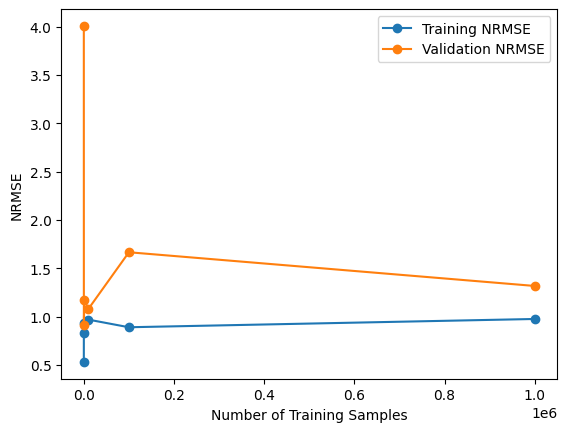

In [49]:
num_samples_list = [10**x for x in range(1,7)]
train_nrmse_list = []
val_nrmse_list = []
var = 5
for num_samples in num_samples_list:
    X_train, X_val, t_train, t_val = generateData(num_samples, var)
    print(X_train)
    train_nrmse,val_nrmse = pseudoInverseRegression(X_train, t_train, X_val, t_val, 0, 0)
    train_nrmse_list.append(train_nrmse)
    val_nrmse_list.append(val_nrmse)

# I thought here that line plot looks better than line plot
plt.plot(num_samples_list, train_nrmse_list, 'o-', label='Training NRMSE')
plt.plot(num_samples_list, val_nrmse_list, 'o-', label='Validation NRMSE')
plt.xlabel('Number of Training Samples')
plt.ylabel('NRMSE')
plt.legend()
plt.show()

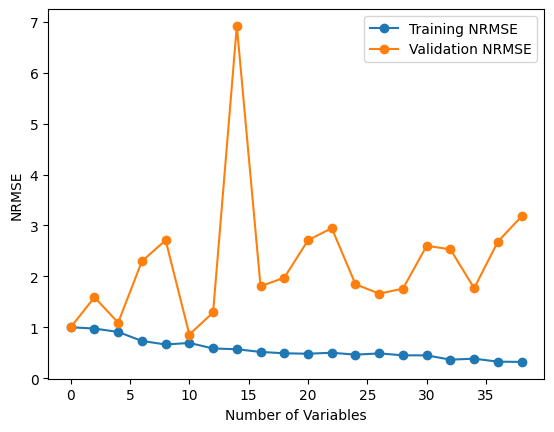

In [50]:
num_samples = 100
train_nrmse_list = []
val_nrmse_list = []
var = [2*x for x in range(20)]
for va in var:
    X_train, X_val, t_train, t_val = generateData(num_samples, va)
    train_nrmse,val_nrmse = pseudoInverseRegression(X_train, t_train, X_val, t_val)
    train_nrmse_list.append(train_nrmse)
    val_nrmse_list.append(val_nrmse)

# I thought here that line plot looks better than line plot
plt.plot(var, train_nrmse_list, 'o-', label='Training NRMSE')
plt.plot(var, val_nrmse_list, 'o-', label='Validation NRMSE')
plt.xlabel('Number of Variables')
plt.ylabel('NRMSE')
plt.legend()
plt.show()

[0.9329594125173759, 0.9323247733800029, 0.9321453413315326, 0.9320975274041403, 0.9320851788254969, 0.9320820405812457, 0.9320812495219585, 0.9320810509378139, 0.9320810011889186, 0.9320809887388093]
******
[1.1775710024492525, 1.1896924460812408, 1.1963990025410571, 1.199932940297614, 1.2017477741907951, 1.20266751605728, 1.2031305144602458, 1.2033628013998494, 1.2034791425437787, 1.2035373626270875]


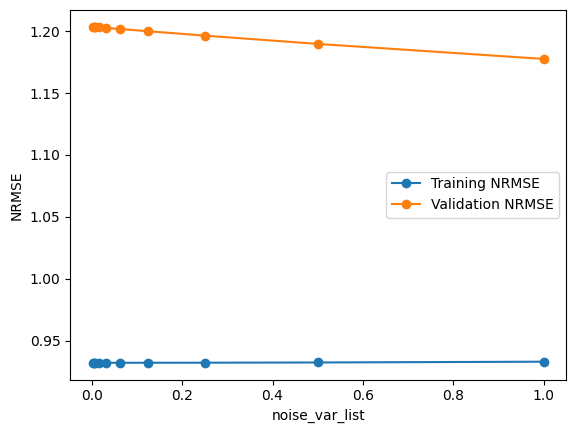

In [51]:
num_samples = 100
train_nrmse_list = []
val_nrmse_list = []
noise_var_list = [0.5**x for x in range(10)]
var = 5
X_train, X_val, t_train, t_val = generateData(num_samples, var)
for n_va in noise_var_list:
    #X_train, X_val, t_train, t_val = generateData(num_samples, var)
    train_nrmse,val_nrmse = pseudoInverseRegression(X_train, t_train, X_val, t_val, noise_var = n_va)
    train_nrmse_list.append(train_nrmse)
    val_nrmse_list.append(val_nrmse)
print(train_nrmse_list)
print('******')
print(val_nrmse_list)
# I thought here that line plot looks better than line plot
plt.plot(noise_var_list, train_nrmse_list, 'o-', label='Training NRMSE')
plt.plot(noise_var_list, val_nrmse_list, 'o-', label='Validation NRMSE')
plt.xlabel('noise_var_list')
plt.ylabel('NRMSE')
plt.legend()
plt.show()

[1.2356299934540769, 0.974179817528133, 0.8969880299748167, 0.8766286717749094, 0.8714645166286329, 0.8701686891827415, 0.869844430692534, 0.8697633471813012, 0.8697430751223727, 0.8697380070338117]
******
[1.2180113379277926, 1.0546536711979446, 1.023691224191806, 1.0227843841044888, 1.0260311190402593, 1.0285722172784846, 1.0300703969811627, 1.0308761160085984, 1.0312930947841823, 1.0315051090355556]


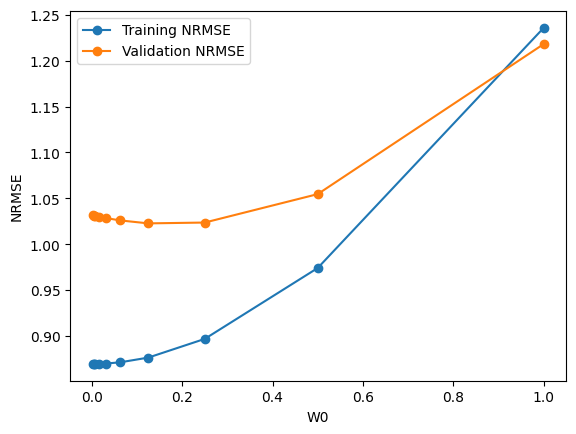

In [52]:
num_samples = 100
train_nrmse_list = []
val_nrmse_list = []
W0 = [0.5**x for x in range(10)]
var = 5
X_train, X_val, t_train, t_val = generateData(num_samples, var)
for w0 in W0:
    #X_train, X_val, t_train, t_val = generateData(num_samples, var)
    train_nrmse,val_nrmse = pseudoInverseRegression(X_train, t_train, X_val, t_val, w0 = w0)
    train_nrmse_list.append(train_nrmse)
    val_nrmse_list.append(val_nrmse)
print(train_nrmse_list)
print('******')
print(val_nrmse_list)
# I thought here that line plot looks better than line plot
plt.plot(W0, train_nrmse_list, 'o-', label='Training NRMSE')
plt.plot(W0, val_nrmse_list, 'o-', label='Validation NRMSE')
plt.xlabel('W0')
plt.ylabel('NRMSE')
plt.legend()
plt.show()

[0.783425486122883, 0.7861606504927524, 0.7923463521455409, 0.8000963712983975, 0.8084261226276543, 0.8168172973833518, 0.8250003777906968, 0.8328415838633173, 0.8402821718010566, 0.8473049769335648]
******
[1.1220685334164497, 1.0940305189331228, 1.0733681227329313, 1.0576779798790221, 1.0454700380195368, 1.035777431241309, 1.0279493737619245, 1.0215343159065806, 1.016210766291371, 1.011744681361115]


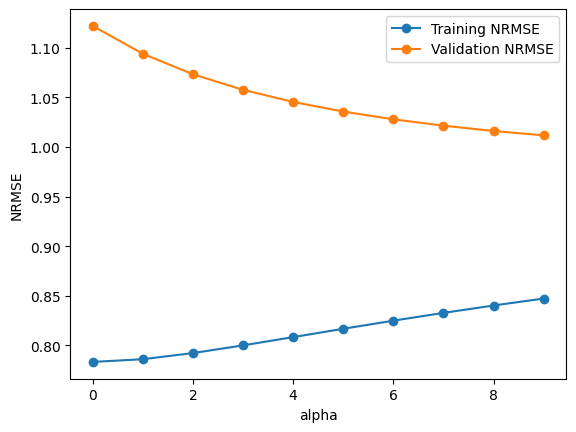

In [53]:
num_samples = 100
train_nrmse_list = []
val_nrmse_list = []
alpha_list = [1*x for x in range(10)]
var = 5
X_train, X_val, t_train, t_val = generateData(num_samples, var)
for alpha_L in alpha_list:
    #X_train, X_val, t_train, t_val = generateData(num_samples, var)
    train_nrmse,val_nrmse = pseudoInverseRegression(X_train, t_train, X_val, t_val, alpha = alpha_L)
    train_nrmse_list.append(train_nrmse)
    val_nrmse_list.append(val_nrmse)
print(train_nrmse_list)
print('******')
print(val_nrmse_list)
# I thought here that line plot looks better than line plot
plt.plot(alpha_list, train_nrmse_list, 'o-', label='Training NRMSE')
plt.plot(alpha_list, val_nrmse_list, 'o-', label='Validation NRMSE')
plt.xlabel('alpha')
plt.ylabel('NRMSE')
plt.legend()
plt.show()

num_samples
10
time
0.0017735958099365234
num_samples
100
time
0.0
num_samples
1000
time
0.0
num_samples
10000
time
0.005200624465942383


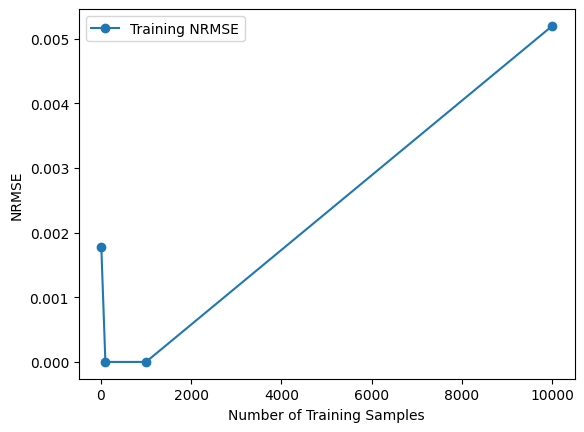

In [54]:
num_samples_list = [10**x for x in range(1,5)]
num_samples1 = []
time1 = []
var = 5
for num_samples in num_samples_list:
    print('num_samples')
    print(num_samples)
    st = time.time()
    X_train, X_val, t_train, t_val = generateData(num_samples, var)
    #print(X_train)
    train_nrmse,val_nrmse = pseudoInverseRegression(X_train, t_train, X_val, t_val, 0, 0)
    et = time.time()
    print('time')
    print(et-st)
    num_samples1.append(num_samples)
    time1.append(et-st)

# I thought here that line plot looks better than line plot
plt.plot(num_samples1, time1, 'o-', label='Training NRMSE')
#plt.plot(num_samples_list, val_nrmse_list, 'o-', label='Validation NRMSE')
plt.xlabel('Number of Training Samples')
plt.ylabel('NRMSE')
plt.legend()
plt.show()

[0.150463   0.27190764 0.20509757 0.22781677 0.36563725 0.26731112
 0.15971046 0.24191249 0.16440492 0.19961016 0.19658157 0.2430516
 0.12561667 0.14217541 0.14062761 0.16303866 0.21676287 0.29103589
 0.21139779 0.21383387 0.18720016 0.26304506 0.24814163 0.19124897
 0.1058408  0.20114473 0.31804153 0.19982844 0.18478534 0.18841454
 0.25410352 0.20554462 0.17147181 0.1882282  0.14731252 0.18411818
 0.23570891 0.23267634 0.28472884 0.17444425 0.18819617 0.2195615
 0.21751945 0.25423886 0.23024711 0.12826869 0.10074119 0.24624066
 0.17944423 0.19911682 0.23936984 0.30696326 0.20536104 0.23564557
 0.23522534 0.12223944 0.20516045 0.20117027 0.06988356 0.18505903
 0.26320779 0.25100056 0.07758078 0.27974067 0.27801563 0.08887575
 0.11430108 0.22932768 0.18607237 0.2672724  0.22694458 0.25857771
 0.16211462 0.14035614 0.17070519 0.20765653 0.1564096  0.14294823
 0.2086177  0.24387824 0.24277358 0.15999893 0.19882961 0.17169031
 0.09817752 0.24393243 0.1727784  0.26222877 0.23675276 0.163567

[ 1.88611713e+00  3.12692638e+00  2.34657701e+00  4.75040577e-01
  3.27464794e+00  1.22825609e+00  1.84178372e+00  1.70296829e+00
  2.02301323e+00  2.22366273e+00  2.25735990e+00  1.54738398e+00
  1.86043734e+00  8.80723829e-01  2.91059364e+00  1.30936691e+00
  8.32915126e-01  2.64895530e+00  3.04284009e+00  1.88491266e+00
  1.90959557e+00  2.26159842e+00  2.72252173e+00  1.01910846e+00
  8.48705904e-01  2.14697006e+00  3.37634545e+00  2.12231990e+00
  1.42435008e+00  1.51224094e+00  1.20065433e+00  1.05670623e+00
  1.35364939e+00  1.01407132e+00  6.13785691e-01  6.14564408e-02
  2.40514658e+00  2.55933497e+00  1.75246225e+00  1.47081897e+00
  1.36659370e+00  2.06486405e+00 -1.49128902e-01  4.79915118e-01
  1.90366430e+00  1.77301433e+00  2.24468119e-01  1.71877177e+00
  2.58717293e+00  1.25872423e+00  1.85302529e+00  2.77537234e+00
  1.37540488e+00  6.26924305e-01  2.61368136e+00  1.15308222e+00
  1.12384385e+00  1.84806600e+00  4.91551706e-01  2.32289703e+00
  3.28332577e+00  1.36079

[ 1.88621029e+00  3.12705197e+00  2.34684500e+00  4.74737584e-01
  3.27476105e+00  1.22823833e+00  1.84170945e+00  1.70309616e+00
  2.02304695e+00  2.22380358e+00  2.25747188e+00  1.54732196e+00
  1.86062724e+00  8.80626503e-01  2.91093160e+00  1.30924705e+00
  8.32799967e-01  2.64905811e+00  3.04302721e+00  1.88500083e+00
  1.90983667e+00  2.26166258e+00  2.72254896e+00  1.01923347e+00
  8.48677864e-01  2.14703103e+00  3.37663021e+00  2.12255366e+00
  1.42455688e+00  1.51235211e+00  1.20043097e+00  1.05647414e+00
  1.35377453e+00  1.01391197e+00  6.13759495e-01  6.12811660e-02
  2.40516421e+00  2.55963237e+00  1.75236912e+00  1.47076388e+00
  1.36643386e+00  2.06487317e+00 -1.49465828e-01  4.79596790e-01
  1.90359654e+00  1.77306523e+00  2.24521863e-01  1.71863376e+00
  2.58735617e+00  1.25866288e+00  1.85314457e+00  2.77531667e+00
  1.37548061e+00  6.26752653e-01  2.61385481e+00  1.15312298e+00
  1.12364238e+00  1.84825593e+00  4.91602824e-01  2.32301745e+00
  3.28346717e+00  1.36072

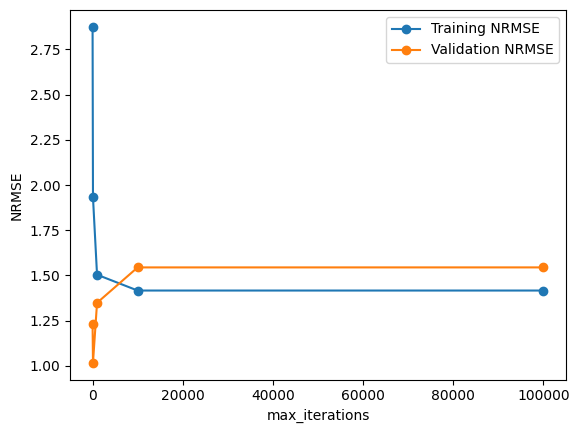

In [55]:
num_samples = 1000
train_nrmse_list = []
val_nrmse_list = []
max_iterations = [10**x for x in range(1, 6)]
var = 5
X_train, X_val, t_train, t_val = generateData(num_samples, var)
for max_iteration in max_iterations:
    #X_train, X_val, t_train, t_val = generateData(num_samples, var)
    weights, train_nrmse = gradient_descent(X_train, t_train, lambda2 = 0, lambda1 = 0, eta = 0.01, max_iter = max_iteration, min_change_NRMSE = 0.000000000000000000000001)
    y_val = linearRegressionEstimate(X_val, weights)
    val_nrmse = np.sqrt(np.mean((t_val - y_val)**2)) / np.std(t_val)
    print(y_val)
    #train_nrmse,val_nrmse = pseudoInverseRegression(X_train, t_train, X_val, t_val, alpha = alpha_L)
    train_nrmse_list.append(train_nrmse)
    val_nrmse_list.append(val_nrmse)
print(train_nrmse_list)
print('******')
print(val_nrmse_list)
# I thought here that line plot looks better than line plot
plt.plot(max_iterations, train_nrmse_list, 'o-', label='Training NRMSE')
plt.plot(max_iterations, val_nrmse_list, 'o-', label='Validation NRMSE')
plt.xlabel('max_iterations')
plt.ylabel('NRMSE')
plt.legend()
plt.show()

[-2.57713797e-01 -2.77872750e-01 -3.55748648e-01 -5.17363820e-02
 -4.17798940e-01 -3.57129043e-01  7.31033044e-03  1.37925917e-02
  1.84579563e-01 -6.59571686e-01 -5.74994796e-01 -7.06880321e-01
 -5.70639617e-01 -5.20043908e-01  2.34710243e-01 -1.32653367e-01
 -2.23759354e-01  4.19458103e-01  2.78358486e-01  1.95111601e-01
  1.08965365e-01 -5.37485633e-01  2.26997379e-01  9.65514819e-02
  3.26053968e-02  2.06271375e-02  2.07594192e-02  1.22836661e-01
 -4.75182815e-01 -6.64147324e-02 -2.02086525e-01 -2.57168749e-02
 -3.09287608e-01 -1.65620690e-01 -2.52950106e-01 -1.06685250e-01
 -3.57919128e-01 -1.72494451e-01 -3.46199482e-01  8.36904493e-02
  5.85426105e-03 -2.94839640e-01 -3.35777060e-01 -3.18947248e-01
 -2.55362866e-01 -5.26371894e-02 -3.15370874e-01 -8.71967223e-02
  2.72637523e-01 -1.59319830e-01 -2.03737659e-01  6.55748689e-02
 -2.92400346e-01 -2.81654533e-01 -5.97802594e-02 -4.24567311e-01
  7.04113427e-02 -2.15288136e-01 -5.53925595e-01  2.44950603e-01
  2.65617472e-01  9.17242

[-2.56933176e-01 -2.77920403e-01 -3.56557495e-01 -5.30756466e-02
 -4.16795520e-01 -3.56085529e-01  6.63306919e-03  1.16332553e-02
  1.82163858e-01 -6.57222290e-01 -5.73140429e-01 -7.04691703e-01
 -5.67987305e-01 -5.17638504e-01  2.32670771e-01 -1.33234154e-01
 -2.22912981e-01  4.15828124e-01  2.75762602e-01  1.93672572e-01
  1.08097380e-01 -5.34862955e-01  2.25172671e-01  9.48435883e-02
  3.06734060e-02  1.97084320e-02  1.96285934e-02  1.21702618e-01
 -4.73745332e-01 -6.63449247e-02 -2.01697140e-01 -2.64611172e-02
 -3.07955106e-01 -1.65580401e-01 -2.53302171e-01 -1.06139282e-01
 -3.57726730e-01 -1.72254036e-01 -3.44511221e-01  8.23890845e-02
  4.96222712e-03 -2.94462813e-01 -3.35159910e-01 -3.18984190e-01
 -2.55586271e-01 -5.20044354e-02 -3.15609583e-01 -8.81869677e-02
  2.70101024e-01 -1.59634765e-01 -2.03455456e-01  6.35579711e-02
 -2.92183219e-01 -2.82117191e-01 -6.00195909e-02 -4.23834910e-01
  6.93225663e-02 -2.14648329e-01 -5.52290871e-01  2.43282262e-01
  2.63392620e-01  9.09395

[-2.25842590e-01 -2.59609213e-01 -3.40593292e-01 -8.67559950e-02
 -3.58871517e-01 -3.09198124e-01 -2.80162314e-02 -6.81870325e-02
  8.85844939e-02 -5.33247641e-01 -4.83441015e-01 -5.69344357e-01
 -4.43455261e-01 -4.20054982e-01  1.21586828e-01 -1.48475892e-01
 -2.05789196e-01  2.59181137e-01  1.60674218e-01  9.82660480e-02
  6.12690777e-02 -4.36666447e-01  1.44912437e-01  1.73753282e-02
 -4.25919505e-02 -4.43300184e-02 -3.04756854e-02  3.95264309e-02
 -3.93531749e-01 -8.11840497e-02 -1.94989938e-01 -7.42464013e-02
 -2.60127991e-01 -1.78915114e-01 -2.43120410e-01 -1.10464273e-01
 -3.20820631e-01 -1.55372891e-01 -2.83780176e-01  1.42211488e-02
 -3.10974346e-02 -2.58899204e-01 -2.94518762e-01 -2.82462024e-01
 -2.64142898e-01 -6.76319748e-02 -2.91289782e-01 -1.15928162e-01
  1.39689481e-01 -1.82286240e-01 -2.06639194e-01 -1.79301439e-02
 -2.72615454e-01 -2.80511201e-01 -9.79215867e-02 -3.82036807e-01
  6.05903853e-03 -1.96774983e-01 -4.74996159e-01  1.42669506e-01
  1.39779260e-01  3.57117

[-0.15054055 -0.18915183 -0.24286143 -0.12405372 -0.20929498 -0.19324784
 -0.09750471 -0.20446054 -0.08761762 -0.23899787 -0.27010197 -0.23461635
 -0.16378201 -0.20835074 -0.11870692 -0.16090957 -0.17436701 -0.05917166
 -0.07462295 -0.11970115 -0.04075566 -0.22832616 -0.02000726 -0.13568229
 -0.17280071 -0.18565563 -0.12407561 -0.14922138 -0.19664465 -0.11742601
 -0.17722689 -0.17356494 -0.15740128 -0.20430567 -0.18345237 -0.13473584
 -0.20070768 -0.10581008 -0.15648666 -0.12737663 -0.09628883 -0.15588542
 -0.18401162 -0.15791805 -0.25816916 -0.12824607 -0.19535752 -0.14644837
 -0.13851905 -0.21893163 -0.20925372 -0.16778839 -0.20572742 -0.23720023
 -0.18522833 -0.2649683  -0.1302062  -0.15814817 -0.28802581 -0.08404712
 -0.13050672 -0.09091352 -0.16312337 -0.09237503 -0.24309609 -0.18532802
 -0.10663649 -0.17054382 -0.1066038  -0.24564701 -0.16821345 -0.21003895
 -0.11118274 -0.254949   -0.10278054 -0.07078837 -0.15553549 -0.14471768
 -0.16795639 -0.14962434 -0.09521185 -0.1953785  -0

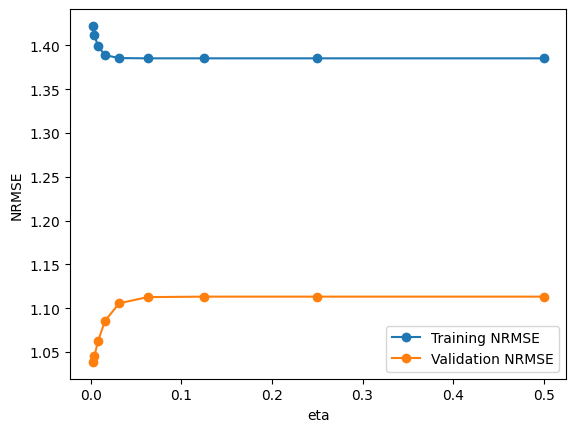

In [56]:
num_samples = 1000
train_nrmse_list = []
val_nrmse_list = []
etaa_list = [0.5**x for x in range(1, 10)]
var = 5
X_train, X_val, t_train, t_val = generateData(num_samples, var)
for etaa in etaa_list:
    #X_train, X_val, t_train, t_val = generateData(num_samples, var)
    weights, train_nrmse = gradient_descent(X_train, t_train, lambda2 = 0, lambda1 = 0, eta = etaa, max_iter = 1000, min_change_NRMSE = 0.000000000000000000000001)
    y_val = linearRegressionEstimate(X_val, weights)
    val_nrmse = np.sqrt(np.mean((t_val - y_val)**2)) / np.std(t_val)
    print(y_val)
    #train_nrmse,val_nrmse = pseudoInverseRegression(X_train, t_train, X_val, t_val, alpha = alpha_L)
    train_nrmse_list.append(train_nrmse)
    val_nrmse_list.append(val_nrmse)
#print(train_nrmse_list)
#print('******')
#print(val_nrmse_list)
# I thought here that line plot looks better than line plot
plt.plot(etaa_list, train_nrmse_list, 'o-', label='Training NRMSE')
plt.plot(etaa_list, val_nrmse_list, 'o-', label='Validation NRMSE')
plt.xlabel('eta')
plt.ylabel('NRMSE')
plt.legend()
plt.show()

In [57]:
num_samples = [10**x for x in range(1, 5)]
train_nrmse_list = []
val_nrmse_list = []
#etaa_list = [0.5**x for x in range(1, 10)]
var = [5*x for x in range(1, 10)]

for sample in num_samples:
    for va in var:
        X_train, X_val, t_train, t_val = generateData(sample, va)
        st = time.time()
        
        #X_train, X_val, t_train, t_val = generateData(num_samples, var)
        weights, train_nrmse = gradient_descent(X_train, t_train, lambda2 = 0, lambda1 = 0, eta = 0.01, max_iter = 1000, min_change_NRMSE = 0.000000000000000000000001)
        y_val = linearRegressionEstimate(X_val, weights)
        val_nrmse = np.sqrt(np.mean((t_val - y_val)**2)) / np.std(t_val)
        ed = time.time()
        print('num_samples = ', sample, 'variables = ', va, 'time = ', ed-st)
        #print(y_val)
        #train_nrmse,val_nrmse = pseudoInverseRegression(X_train, t_train, X_val, t_val, alpha = alpha_L)


num_samples =  10 variables =  5 time =  0.026665210723876953
num_samples =  10 variables =  10 time =  0.01954936981201172
num_samples =  10 variables =  15 time =  0.020700693130493164
num_samples =  10 variables =  20 time =  0.0181424617767334
num_samples =  10 variables =  25 time =  0.01719832420349121
num_samples =  10 variables =  30 time =  0.018646955490112305
num_samples =  10 variables =  35 time =  0.03157615661621094
num_samples =  10 variables =  40 time =  0.016016244888305664
num_samples =  10 variables =  45 time =  0.016693592071533203
num_samples =  100 variables =  5 time =  0.017026662826538086
num_samples =  100 variables =  10 time =  0.016433000564575195
num_samples =  100 variables =  15 time =  0.03361368179321289
num_samples =  100 variables =  20 time =  0.016876935958862305
num_samples =  100 variables =  25 time =  0.016129732131958008
num_samples =  100 variables =  30 time =  0.023289918899536133
num_samples =  100 variables =  35 time =  0.026779651641

In [58]:
num_samples = 1000
train_nrmse_list = []
val_nrmse_list = []
#etaa_list = [0.5**x for x in range(1, 10)]
var = [5*x for x in range(1, 10)]


for va in var:
    X_train, X_val, t_train, t_val = generateData(sample, va)
    st = time.time()

    #X_train, X_val, t_train, t_val = generateData(num_samples, var)
    weights, train_nrmse = gradient_descent(X_train, t_train, lambda2 = 0, lambda1 = 0, eta = 0.01, max_iter = 1000, min_change_NRMSE = 0.000000000000000000000001)
    y_val = linearRegressionEstimate(X_val, weights)
    val_nrmse = np.sqrt(np.mean((t_val - y_val)**2)) / np.std(t_val)
    ed = time.time()
    print('variables = ', va, 'time = ', ed-st)
    #print(y_val)
    #train_nrmse,val_nrmse = pseudoInverseRegression(X_train, t_train, X_val, t_val, alpha = alpha_L)


variables =  5 time =  0.18250584602355957
variables =  10 time =  0.18323183059692383
variables =  15 time =  0.19199895858764648
variables =  20 time =  0.18878936767578125
variables =  25 time =  0.2383277416229248
variables =  30 time =  0.30223822593688965
variables =  35 time =  0.37313032150268555
variables =  40 time =  0.32772183418273926
variables =  45 time =  0.34044694900512695


In [59]:
num_samples = 1000
train_nrmse_list = []
val_nrmse_list = []
#etaa_list = [0.5**x for x in range(1, 10)]
lambda22 = [0.5*x for x in range(1, 10)]


for lambd in lambda22:
    X_train, X_val, t_train, t_val = generateData(sample, va)
    #st = time.time()

    #X_train, X_val, t_train, t_val = generateData(num_samples, var)
    weights, train_nrmse = gradient_descent(X_train, t_train, lambda2 = lambd, lambda1 = 0, eta = 0.01, max_iter = 1000, min_change_NRMSE = 0.000000000000000000000001)
    y_val = linearRegressionEstimate(X_val, weights)
    val_nrmse = np.sqrt(np.mean((t_val - y_val)**2)) / np.std(t_val)
    #ed = time.time()
    print('lambda2 = ', lambd, 'weights = ', weights)

lambda2 =  0.5 weights =  [-1.33157045  0.99545036 -0.32583646 -0.33155492  0.24978887 -0.96669016
 -1.57829347  0.21957693 -0.74596594 -0.23483156  0.85456107 -0.72642423
  0.12667642 -1.53440692  0.13365539 -1.6783312  -0.47285524  0.04213144
  0.17256233 -0.87307808 -0.62098485  0.25376354 -0.15249422 -0.09638931
  0.36825303 -0.1831526   0.81865825  0.58152482 -0.07117567 -0.82497145
 -0.38845662 -0.74198409  0.65898938  0.21096622 -0.02697791  0.21603116
  0.36991566 -0.61167631  1.19741828  0.24407707  0.67047254 -0.91785778
  0.49102723 -1.12460948  0.0079163 ]
lambda2 =  1.0 weights =  [-0.62037665  1.07586352  0.74139345  0.01188494  0.28940498 -0.57527125
  0.92286254 -0.21573788  0.36942628  0.58156669  0.40266208 -0.3123925
  0.92487396 -0.65286836 -0.35260664  1.18646012 -0.57638979  0.36480452
  0.03317806  1.05977739  0.86142858  0.30279164 -0.70053507 -0.52062331
 -0.08306976  0.0160583   0.04193998  0.44385411 -0.80028734  0.05250993
 -0.15336155 -0.44941788 -0.4459776

In [60]:
num_samples = 1000
train_nrmse_list = []
val_nrmse_list = []
#etaa_list = [0.5**x for x in range(1, 10)]
lambda11 = [0.5*x for x in range(1, 10)]


for lambd in lambda11:
    X_train, X_val, t_train, t_val = generateData(sample, va)
    #st = time.time()

    #X_train, X_val, t_train, t_val = generateData(num_samples, var)
    weights, train_nrmse = gradient_descent(X_train, t_train, lambda2 = 0, lambda1 = lambd, eta = 0.01, max_iter = 1000, min_change_NRMSE = 0.000000000000000000000001)
    y_val = linearRegressionEstimate(X_val, weights)
    val_nrmse = np.sqrt(np.mean((t_val - y_val)**2)) / np.std(t_val)
    #ed = time.time()
    print('lambda1 = ', lambd, 'weights = ', weights)

lambda1 =  0.5 weights =  [ 0.23235979 -0.52634698 -0.179445    0.42175991 -0.22091909  0.21284721
  1.22579017  0.16694872 -0.30849975 -0.095001    0.40682232  0.29294591
  0.23663377  1.1320113   0.31717329 -0.1573893  -0.02694227 -0.02167438
  0.10817679 -0.26743355 -0.0811386   0.03607472  0.47388821 -0.94694361
 -1.0509377   0.30933812 -0.65087859  0.21273385 -0.20913406  0.74893402
 -1.15570243 -0.19641351 -0.4471986   0.47620118 -0.05199036  0.06924631
  0.51814461  0.20360651  0.3750233   0.04401812 -0.78846989  0.14628023
  0.25503544 -0.3122152   0.02747943]
lambda1 =  1.0 weights =  [-0.07887458 -1.15338625  0.7406403   0.42432326 -0.00200454  0.0275167
 -1.16880185 -0.28327831  0.00497829  0.16372507  0.14882923  0.49146287
 -0.13261115  0.84883275 -0.38389123 -0.38305575  0.20330482 -0.12054399
 -0.96002744 -0.05238947  0.75021371  0.42590319  0.24368131 -0.28619778
  0.14397953 -0.11433426  1.16181022  0.21922947  0.23489637 -0.21204324
  0.2675072   0.2660148   0.5138125

This assignment is helpful to gain knowledge of how regression works in python
In this we use modstly two methods
1) pseudo inverse method
2) iteration method

So in this I learn abour how maths work behind algorithems and how to impliment them with python code'
also get insights about how time complexity works in this algorithems

also understands ML is not only use skikit learn and apply models with two lines of code, its much more complex than that and how complex maths works behind algorithems which liooks simple to apply in skikit learn


Video link - https://drive.google.com/file/d/1zrCAEXrutRGi3Lm_RUqWLtER4rkqmFis/view?usp=sharing